In [1]:
import numpy as np
import pandas as pd
from pyedflib import highlevel

In [5]:
pd.read_csv("participant_info.csv")

,sn,age,sex,category
0,1,44,M,Control
1,10,74,F,Patient
2,11,22,F,Control
3,12,28,F,Control
4,13,23,F,Control
5,14,22,F,Patient
6,15,57,F,Patient
7,16,39,F,Patient
8,17,39,M,Control
9,18,52,F,Patient


In [2]:
dataset_dir = "./Acquired Dataset"
user_data = {"sn": [], "age": [], "sex": [], "category": []}

for d in os.listdir(dataset_dir):
    with open(f"{dataset_dir}/{d}/userfile.gnr", "r") as user_file:
        user_data["sn"].append(int(d))

        user_info = user_file.readlines()

        age = (user_info[3].strip()).split("=")[-1]
        user_data["age"].append(age)

        sex = (user_info[4].strip()).split("=")[-1]
        user_data["sex"].append(sex)

        category = (user_info[5].strip()).split("=")[-1]
        user_data["category"].append(category)

user_df = pd.DataFrame(user_data)
user_df

,sn,age,sex,category
0,1,44,M,Control
1,10,74,F,Patient
2,11,22,F,Control
3,12,28,F,Control
4,13,23,F,Control
5,14,22,F,Patient
6,15,57,F,Patient
7,16,39,F,Patient
8,17,39,M,Control
9,18,52,F,Patient


In [7]:
user_df.to_csv("./Acquired Dataset/user_info.csv", index=False)

In [8]:
user_df.category.value_counts()

category
Patient    18
Control    14
Name: count, dtype: int64

In [3]:
from pyedflib import highlevel
import pandas as pd

signals, signal_headers, headers = highlevel.read_edf(
    "Acquired Dataset/1/16/Phase 1.edf"
)
print(signals)
print(signal_headers)
print(headers)

[[ 5.00000000e+00  5.00000000e+00  7.14285714e-01 ... -5.15873016e+00
  -7.93650794e-02 -7.93650794e-02]
 [ 5.55555556e-01  5.55555556e-01  1.34920635e+00 ...  1.34920635e+00
   1.82539683e+00  1.82539683e+00]
 [-6.42857143e+00 -6.42857143e+00 -1.37301587e+01 ... -4.68253968e+00
  -1.34920635e+00 -1.34920635e+00]
 ...
 [-3.25000000e+02 -3.25000000e+02 -3.25000000e+02 ... -3.25000000e+02
  -3.25000000e+02 -3.25000000e+02]
 [-3.25000000e+02 -3.25000000e+02 -3.25000000e+02 ... -3.25000000e+02
  -3.25000000e+02 -3.25000000e+02]
 [-7.53968254e+00 -7.53968254e+00 -7.53968254e+00 ... -3.21825397e+02
  -3.21825397e+02 -3.21825397e+02]]
[{'label': 'Fp1[1]', 'dimension': 'uV', 'sample_rate': 100.0, 'sample_frequency': 100.0, 'physical_max': 325.0, 'physical_min': -325.0, 'digital_max': 4095, 'digital_min': 0, 'prefilter': '', 'transducer': 'AgAgCl electrodes'}, {'label': 'Fp2[2]', 'dimension': 'uV', 'sample_rate': 100.0, 'sample_frequency': 100.0, 'physical_max': 325.0, 'physical_min': -325.0, '

In [17]:
electrodes = [s["label"] for s in signal_headers]
electrodes

['Fp1[1]',
 'Fp2[2]',
 'F3[3]',
 'F4[4]',
 'C3[5]',
 'C4[6]',
 'P3[7]',
 'P4[8]',
 'O1[9]',
 'O2[10]',
 'F7[11]',
 'F8[12]',
 'T3[13]',
 'T4[14]',
 'T5[15]',
 'T6[16]',
 'Fz[17]',
 'Pz[18]',
 'Cz[19]',
 'Pg1[20]',
 'Pg2[21]',
 'EOGR[22]',
 'EOOGL[23]',
 'EMG[24]']

In [12]:
len(signals[1])

500

In [26]:
from pyedflib import highlevel
import pandas as pd

import numpy as np

In [58]:
acquired_dataset_dir = "Acquired Dataset"
for participant in os.listdir(acquired_dataset_dir):
    if not os.path.exists(f"Output EEG Data/{participant}"):
        os.mkdir(f"Output EEG Data/{participant}")

    all_items = os.listdir(f"{acquired_dataset_dir}/{participant}")
    folders = [
        item
        for item in all_items
        if os.path.isdir(os.path.join(acquired_dataset_dir, item))
    ]

    done = False
    for f in folders:
        num_phases = len(os.listdir(f"{acquired_dataset_dir}/{participant}/{f}"))
        if num_phases == 4:
            done = True
            for i in range(1, 5):
                edf_file_path = (
                    f"{acquired_dataset_dir}/{participant}/{f}/Phase {i}.edf"
                )
                sgnls, _, _ = highlevel.read_edf(edf_file_path)
                transposed_signals = np.transpose(sgnls)
                pd.DataFrame(transposed_signals, columns=electrodes).to_csv(
                    f"Output EEG Data/{participant}/Phase {i}.csv", index=None
                )

        if done:
            break

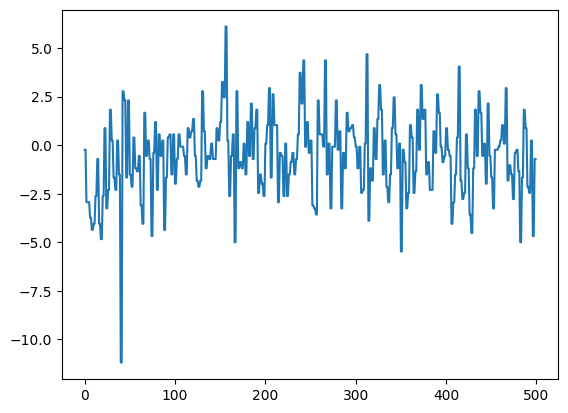

In [15]:
import matplotlib.pyplot as plt

plt.plot(signals[6])

In [46]:
participants = pd.read_csv("participant_info.csv")
participants

,sn,age,sex,category
0,1,44,M,Control
1,10,74,F,Patient
2,11,22,F,Control
3,12,28,F,Control
4,13,23,F,Control
5,14,22,F,Patient
6,15,57,F,Patient
7,16,39,F,Patient
8,17,39,M,Control
9,18,52,F,Patient


In [50]:
patients = participants[participants["category"] == "Patient"]["sn"]
controls = participants[participants["category"] == "Control"]["sn"]

list(patients), list(controls)

([10, 14, 15, 16, 18, 2, 20, 21, 22, 23, 25, 3, 4, 5, 6, 7, 8, 9],
 [1, 11, 12, 13, 17, 19, 24, 26, 27, 28, 29, 30, 31, 32])

In [81]:
cntrls = {}
ptnts = {}

In [82]:
def calculate_power(data, freq_range):
    lower, upper = freq_range
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), 1 / 100)

    # Filter frequencies within the range 8 to 13 Hz
    mask = (frequencies >= lower) & (frequencies <= upper)
    filtered_frequencies = frequencies[mask]
    filtered_fft_result = fft_result[mask]
    # Calculate power spectrum
    power_spectrum = (np.abs(filtered_fft_result) ** 2) / len(filtered_fft_result) ** 2

    return power_spectrum

In [90]:
alpha_electrodes = ["O1[9]", "O2[10]", "P3[7]", "P4[8]", "Fz[17]"]

# def calculate_power(freq_range, electrodes):
for dir in os.listdir("Output EEG Data"):
    rest0_phase_file = f"Output EEG Data/{dir}/Phase 3.csv"
    rest0_phase = pd.read_csv(rest0_phase_file)

    for electrode in alpha_electrodes:
        data = rest0_phase[electrode]

        if int(dir) in controls:
            cntrls[dir] = {}
            cntrls[dir][electrode] = calculate_power(data, (8, 13))
        else:
            ptnts[dir] = {}
            ptnts[dir][electrode] = calculate_power(data, (8, 13))

In [92]:
import matplotlib.pyplot as plt

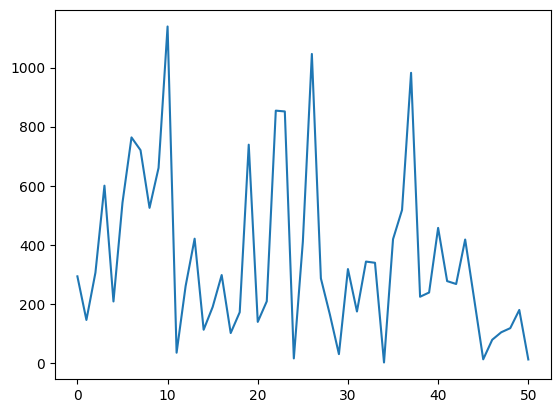

In [99]:
plt.plot(list(cntrls["10"]["Fz[17]"]))

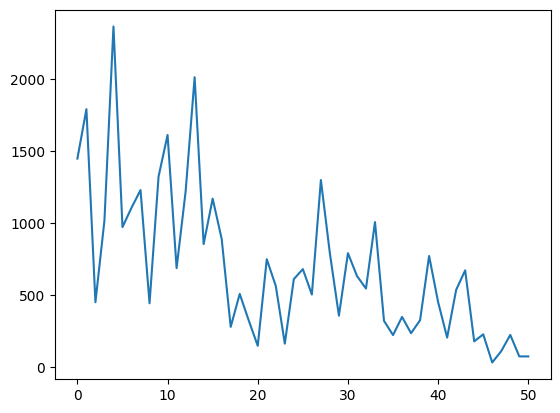

In [100]:
plt.plot(list(ptnts["1"]["Fz[17]"]))

In [101]:
patients = [10, 14, 15, 16, 18, 2, 20, 21, 22, 23, 25, 3, 4, 5, 6, 7, 8, 9]

a_cntrls = {}
a_ptnts = {}

b_cntrls = {}
b_ptnts = {}

g_cntrls = {}
g_ptnts = {}


def calculate_power(data, freq_range):
    lower, upper = freq_range
    fft_result = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), 1 / 100)

    # Filter frequencies within the range 8 to 13 Hz
    mask = (frequencies >= lower) & (frequencies <= upper)
    filtered_frequencies = frequencies[mask]
    filtered_fft_result = fft_result[mask]
    # Calculate power spectrum
    power_spectrum = (np.abs(filtered_fft_result) ** 2) / len(filtered_fft_result) ** 2

    return power_spectrum


alpha_electrodes = ["O1[9]", "O2[10]", "P3[7]", "P4[8]", "Fz[17]"]

for dir in os.listdir("Output EEG Data"):
    rest0_phase_file = f"Output EEG Data/{dir}/Phase 1.csv"
    rest0_phase = pd.read_csv(rest0_phase_file)

    for electrode in alpha_electrodes:
        data = rest0_phase[electrode]

        if int(dir) not in patients:
            a_cntrls[dir] = {}
            a_cntrls[dir][electrode] = calculate_power(data, (8, 13))
        else:
            a_ptnts[dir] = {}
            a_ptnts[dir][electrode] = calculate_power(data, (8, 13))

In [107]:
print(a_cntrls["1"][alpha_electrodes[-1]])

[4.59407775e+02 1.42436620e+03 1.17784514e+03 6.76409599e+02
 1.21674929e+03 9.39947014e+02 1.02676999e+03 5.91835659e+02
 9.40106286e+02 2.70657313e+01 5.88649963e+02 1.59380431e+02
 5.45717308e+01 1.02911524e+02 2.17388134e+02 4.20476095e+01
 3.42597557e+02 1.33074595e+01 1.19977566e+02 9.44170977e-01
 1.75929672e+02 3.89116934e+02 2.05993623e+02 6.04488682e+02
 3.25825016e+02 2.54545117e+02 3.25187480e+02 1.20857768e+02
 1.63536710e+02 1.70422816e+01 5.60434121e+01 5.14601212e+02
 4.03563968e+02 6.79432866e+02 3.67700081e+02 9.24304167e+01
 5.18481074e+01 2.89110850e+02 3.61246224e+02 9.05407664e+02
 7.47885892e+02 1.01270627e+03 2.26467865e+02 1.38972250e+02
 6.19779959e+02 1.10127255e+03 2.64995326e+02 5.12679963e+01
 3.12217322e+02 4.29715483e+02 3.70112727e+01]
